# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
! pip install Pillow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [3]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 12.47 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [4]:
!ls MNIST

processed  raw


In [5]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [6]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

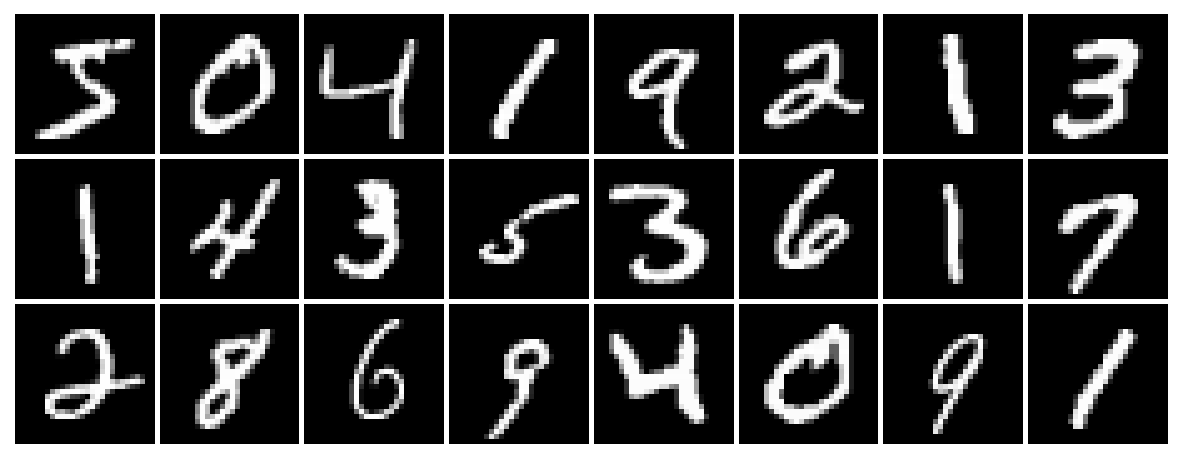

In [7]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


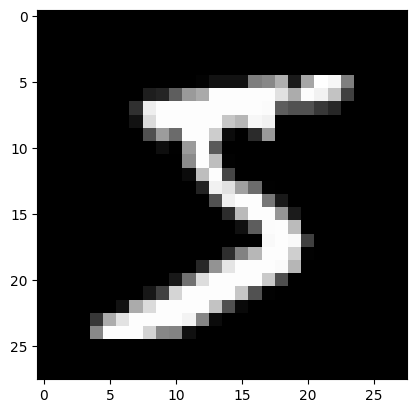

In [8]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [9]:
model = torch.nn.Linear(28*28, 10) # 28*28 (784) atributos de entrada e 10 neurônios na saída
# 784 * 10 + 10 = 7850 parâmetros

### Testando um predict com poucas amostras

In [10]:
xin = x_train[:5].view(-1,28*28)
score = model(xin)
score

tensor([[-0.2638,  0.3162, -0.4785, -0.0589,  0.0356,  0.0848, -0.0757,  0.1206,
         -0.0759,  0.0314],
        [-0.3328,  0.0239,  0.0198, -0.0241,  0.0262, -0.1306,  0.0348,  0.0546,
         -0.1611, -0.3129],
        [-0.2471, -0.0160, -0.0450,  0.0359, -0.2643, -0.2869, -0.0084, -0.1209,
         -0.0970, -0.1712],
        [ 0.1306,  0.2484, -0.0283, -0.0823, -0.1161, -0.1438, -0.0885, -0.1480,
         -0.1963, -0.0942],
        [-0.0356, -0.0040, -0.0891, -0.2231,  0.0167, -0.0212, -0.0182, -0.3203,
         -0.0491, -0.2094]], grad_fn=<AddmmBackward0>)

In [11]:
import torch.nn as nn
import torch.nn.functional as F
prob,y_pred = torch.max(F.softmax(score,dim=1),dim=1)
print(y_pred)
print(prob)

tensor([1, 7, 3, 1, 4])
tensor([0.1394, 0.1134, 0.1164, 0.1338, 0.1112], grad_fn=<MaxBackward0>)


## Treinamento

### Inicialização dos parâmetros

In [12]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [13]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-sy8ycmi1
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-sy8ycmi1
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4972 sha256=08b9879c58004c8f587a9e4d42d4e6a4c5a309f61ef61d9318159c4b33d5a2a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-86yq9n9d/wheels/8a/88/98/69bcb99aba99a6bba9b2b81439cbda0101df40c49e639c4216
Successfully built torchviz


In [14]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3380, grad_fn=<NllLossBackward0>)

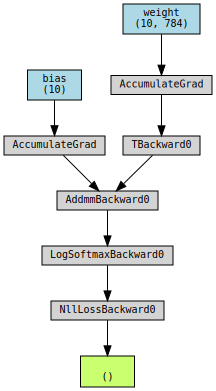

In [15]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [16]:
import numpy
losses = []
zs = []

for epoch in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = x_train.view(-1, 28 * 28)

    # Forward
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, y_train)

    # zero grad
    optimizer.zero_grad()

    # backpropagation
    loss.backward()

    # Pegamos os gradientes da classe 4 (linha 4 da matriz de pesos)
    grad_class4 = model.weight.grad[4].detach().numpy()
    print(f"\nGradientes da classe 4 na época {epoch+1}:")
    print(grad_class4.reshape(28,28))  # visualização em formato de imagem

    # Atualiza parâmetros
    optimizer.step()

    # guarda perda
    losses.append(loss.item())

    # calcula acurácia na mesma época
    _, predicts = torch.max(outputs, 1)
    accuracy = (predicts.numpy() == y_train.numpy()).mean()

    print(f"Época {epoch+1}/{epochs}  -  Loss: {loss.item():.4f}  -  Acurácia: {accuracy:.4f}")


A saída de streaming foi truncada nas últimas 5000 linhas.
   1.22560101e-04 -1.73141889e-04 -2.70505727e-04  4.88858714e-05
   3.28842318e-04  2.48165248e-04  1.95193043e-05  2.39800211e-05
   1.60589479e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.08856124e-07
   4.39566757e-05  1.22538986e-04  3.00840184e-04  7.45618367e-04
   6.19540631e-04 -9.31841205e-05  1.28815614e-03  1.31096249e-03
   1.04559027e-03  9.52761970e-04  1.02712715e-03  1.09220331e-03
   9.90761793e-04  6.32996089e-04  8.25596042e-04  4.91030107e-04
   3.07826966e-04  7.59350514e-05  2.65018462e-05  3.35022887e-05
   7.33727802e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.14417423e-06
   1.71828797e-05  2.88500687e-05  5.98827100e-05  4.69284059e-05
  -4.82039875e-04 -2.59877299e-04  8.12968356e-05  6.65039843e-05
   1.55201778e-04  1.01026824e-04  4.45333280e-04  4.36835631e-04
   3.63745261e-

In [17]:
print('Final loss:', loss.item())

Final loss: 0.26639339327812195


### Visualizando gráfico de perda durante o treinamento

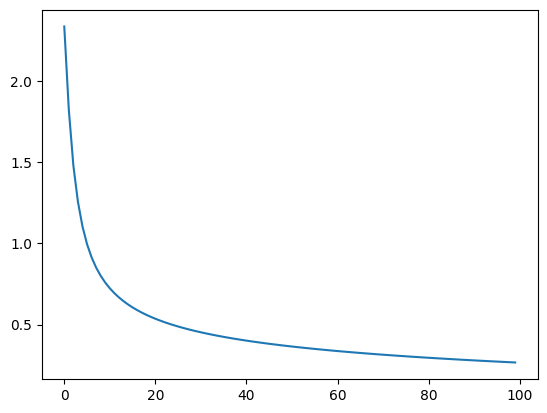

In [18]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [19]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.942


### Matriz de confusão com dados de treinamento e teste

In [20]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,97,0,1,0,0,0,1,0,0,2
1,0,110,1,0,0,0,1,2,1,0
2,0,1,91,1,0,1,1,1,2,1
3,0,0,0,87,0,2,0,0,0,0
4,0,0,1,0,102,2,0,2,0,3
5,0,2,0,2,0,82,0,0,2,1
6,0,0,1,1,2,2,90,0,0,0
7,0,1,1,1,0,0,0,111,0,3
8,0,2,2,0,0,1,1,0,82,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


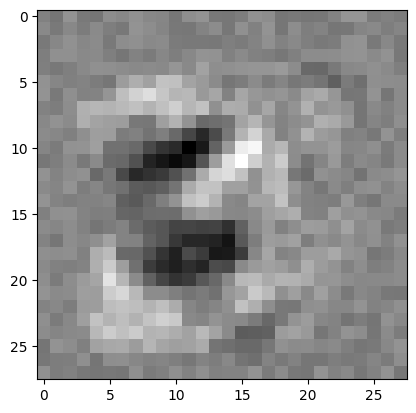

In [21]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

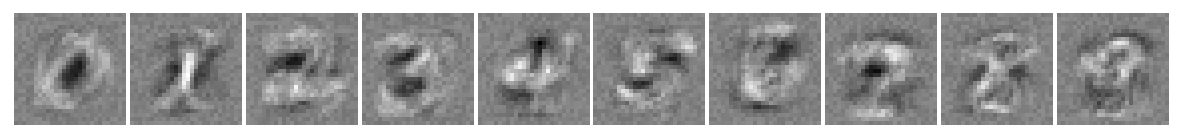

In [22]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
(28*28)
**R: (N, 784)**
2. Qual é o shape da saída da rede?
(10)
**R: (N,10)**
3. Qual é o número total de parâmetros da rede, incluindo o bias?
28*28 * 10 + 10
**R: 7.850**

# Aprendizados


Com a atividade foi possível entender como imagens de 28×28 são transformadas em vetores de 784 atributos e como a rede produz 10 valores correspondendo às classes. Além disso, foi aprendido como calcular o número total de parâmetros e vizualizar a evolução da perda e da acurácia durante o treinamento com gradiente descendente. Também foi possível ver como a análise dos gradientes da classe 4 revelou a forma que a rede ajusta seus pesos específicos a cada época, permitindo observar o comportamento interno do processo de aprendizagem.